In [73]:
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import wfdb
import os
from wfdb import processing
import numpy as np
import cv2

In [3]:
wfdb.dl_database('mitdb', os.getcwd()+"/mitdb")

HTTPError: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/mitdb

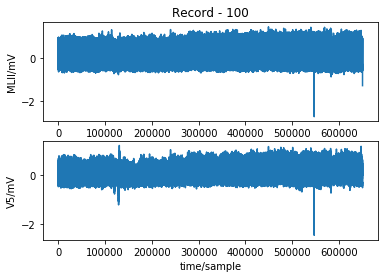

Press enter to continue...


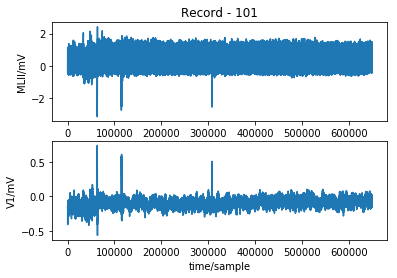

Press enter to continue...


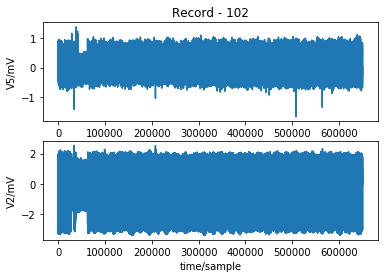

Press enter to continue...


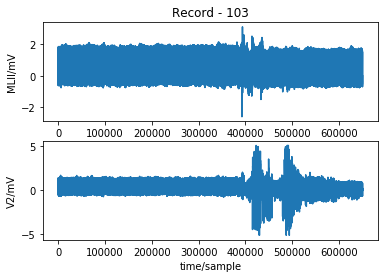

Press enter to continue...


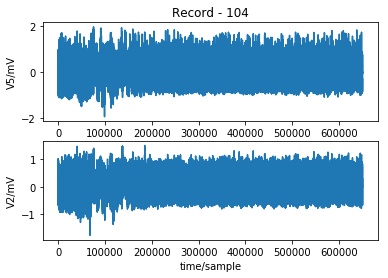

Press enter to continue...


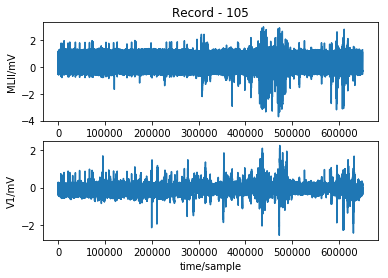

Press enter to continue...


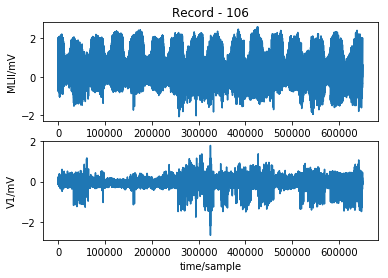

KeyboardInterrupt: 

In [5]:
wfdb.plot_all_records("../dataset/mitdb")

In [7]:
record = wfdb.rdrecord('../dataset/mitdb/106', channels=[0])
annotation = wfdb.rdann('../dataset/mitdb/106','atr')
signal, fields = wfdb.rdsamp('../dataset/mitdb/106', channels=[0])

In [72]:
wfdb.plot_wfdb(record=record, annotation=annotation, plot_sym=True, figsize=(20,8))

KeyboardInterrupt: 

ValueError: Image size of 419794x534 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1366x576 with 1 Axes>

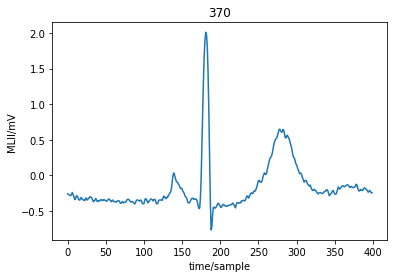

True

In [9]:
figure = []

record = wfdb.rdrecord('../dataset/mitdb/106', sampfrom=370-200, sampto=370+200, channels=[0])
figure.append(wfdb.plot_wfdb(record=record, title=370, return_fig=True))

figure[0].savefig('../screenshots/report_pics/description_of_the_process/' + "/" + 'full_plot' + ".png")

image = figure[0]

image.canvas.draw()

data = np.frombuffer(image.canvas.tostring_rgb(), dtype=np.uint8)

data = data.reshape((image.canvas.get_width_height()[::-1] + (3,)))

data = cv2.cvtColor(data, cv2.COLOR_RGB2BGR)

data = data[288-250:288-35, 55:390]

cv2.imwrite('../screenshots/report_pics/description_of_the_process/' + "/" + 'cropped_rt_plot' + ".png", data)

In [10]:
# 'sample' and 'symbol'
annotation.__dict__

{'record_name': '106',
 'extension': 'atr',
 'sample': array([    83,    229,    351, ..., 649162, 649340, 649791]),
 'symbol': ['~',
  '+',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  '~',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  '~',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  '~',
  'N',
  'V',
  'V',
  'N',
  'V',
  'V',
  'N',
  'N',
  'V',
  'N',
  'V',
  'V',
  'N',
  'V',
  'N',
  'V',
  'V',
  'N',
  'N'

In [11]:
record.__dict__

{'record_name': '106',
 'n_sig': 1,
 'fs': 360,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 400,
 'base_time': None,
 'base_date': None,
 'comments': ['24 F 1581 654 x1', 'Inderal', 'The PVCs are multiform.'],
 'sig_name': ['MLII'],
 'p_signal': array([[-0.26 ],
        [-0.265],
        [-0.275],
        [-0.28 ],
        [-0.285],
        [-0.265],
        [-0.24 ],
        [-0.265],
        [-0.295],
        [-0.33 ],
        [-0.34 ],
        [-0.295],
        [-0.285],
        [-0.295],
        [-0.33 ],
        [-0.345],
        [-0.345],
        [-0.32 ],
        [-0.31 ],
        [-0.335],
        [-0.34 ],
        [-0.35 ],
        [-0.34 ],
        [-0.35 ],
        [-0.315],
        [-0.335],
        [-0.345],
        [-0.325],
        [-0.32 ],
        [-0.3  ],
        [-0.305],
        [-0.305],
        [-0.325],
        [-0.355],
        [-0.37 ],
        [-0.35 ],
        [-0.345],
        [-0.325],
        [-0.355],
        [-0.365],
        [-0.355],
   

In [12]:
signal[:,0]

array([-0.31 , -0.31 , -0.31 , ...,  0.635,  0.265,  0.   ])

In [24]:
fields

{'fs': 360,
 'sig_len': 650000,
 'n_sig': 1,
 'base_date': None,
 'base_time': None,
 'units': ['mV'],
 'sig_name': ['MLII'],
 'comments': ['24 F 1581 654 x1', 'Inderal', 'The PVCs are multiform.']}

In [38]:
rqrs = processing.xqrs_detect(record.p_signal[:,0], record.fs)

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


In [39]:
len(rqrs)

1939

In [40]:
recs = ["106"]

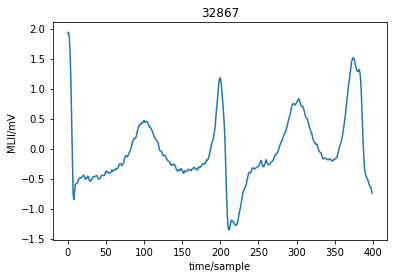

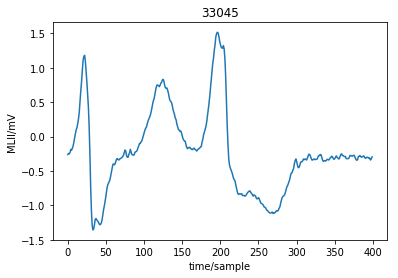

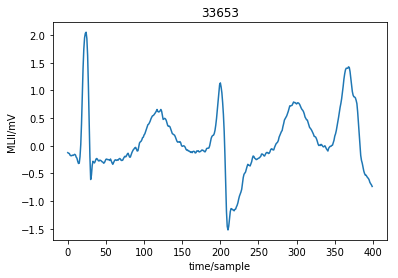

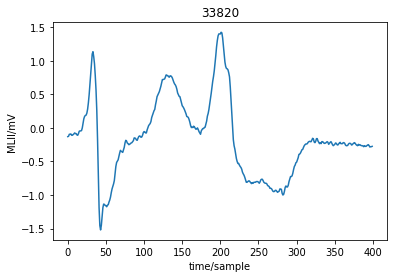

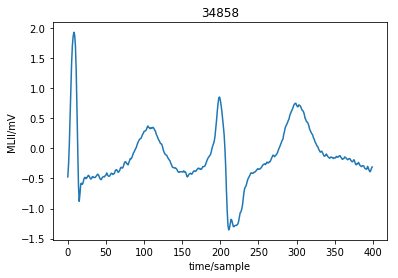

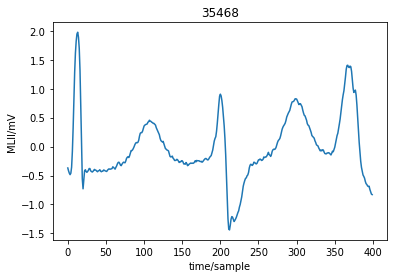

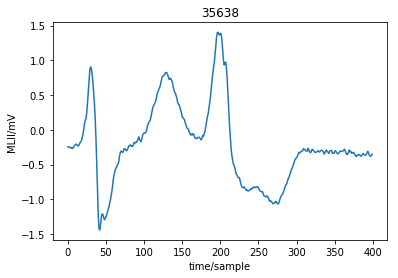

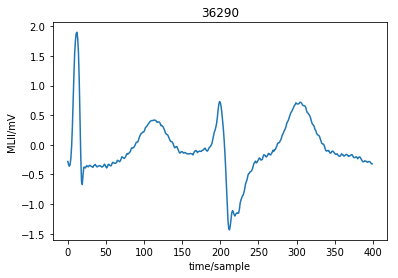

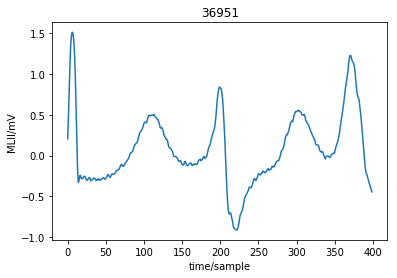

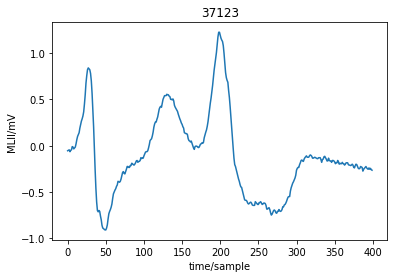

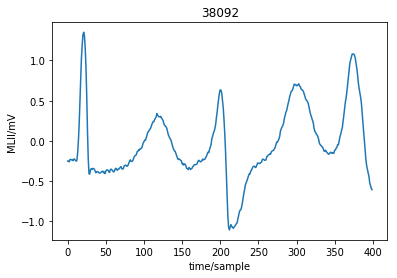

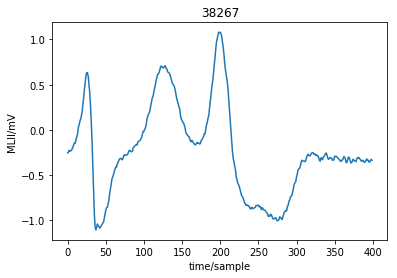

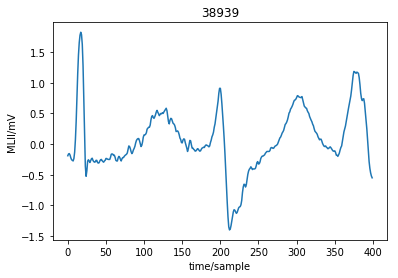

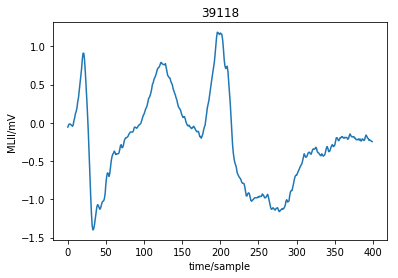

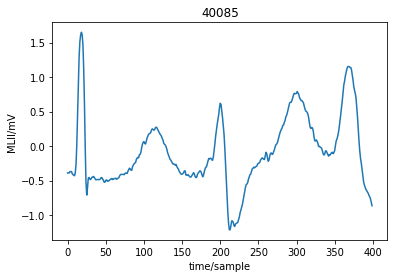

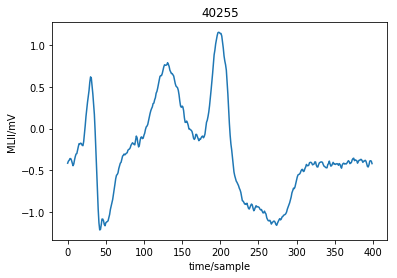

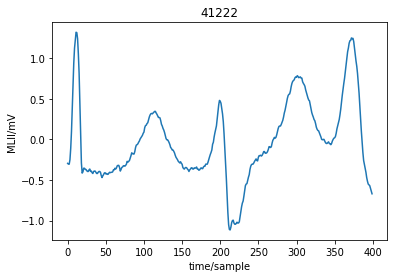

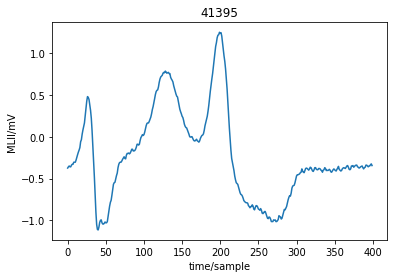

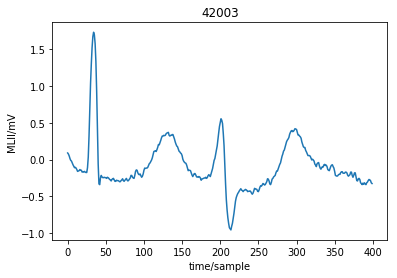

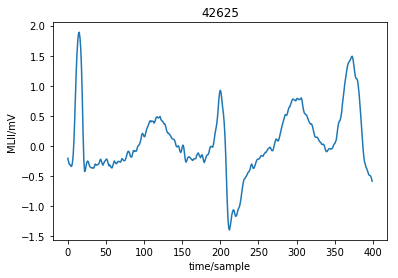

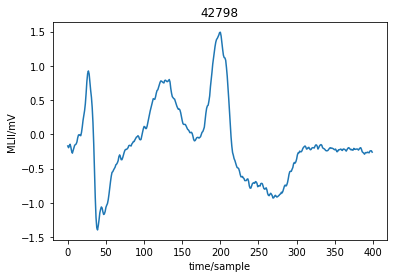

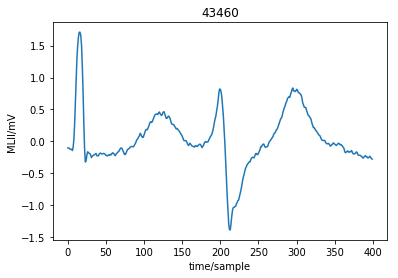

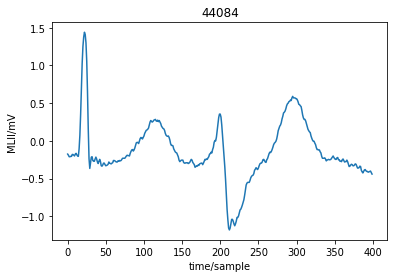

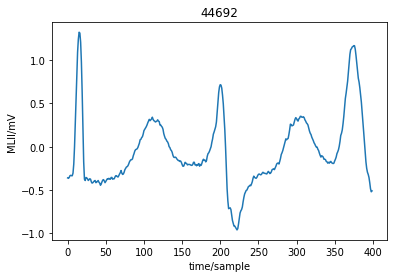

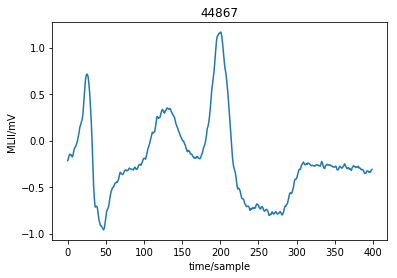

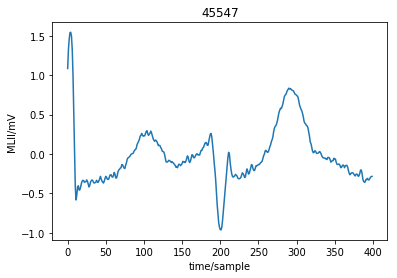

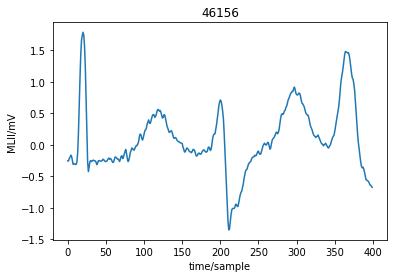

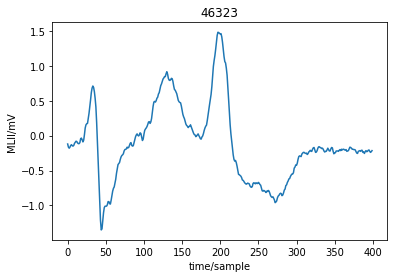

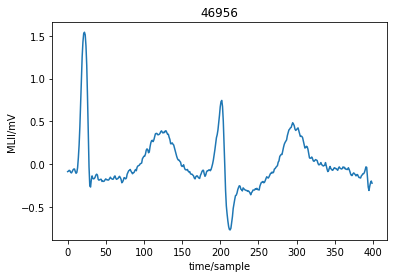

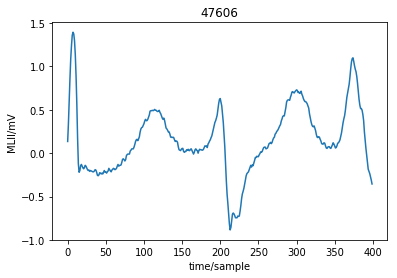

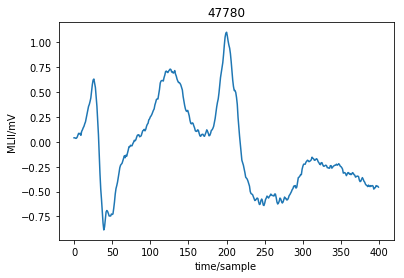

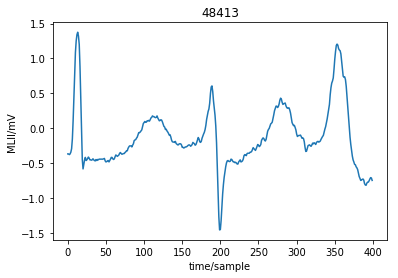

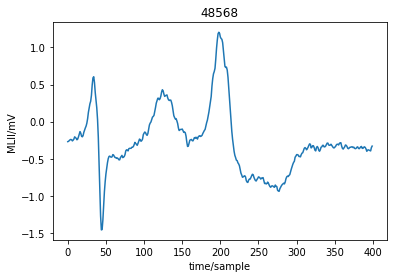

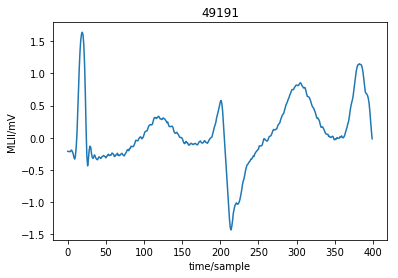

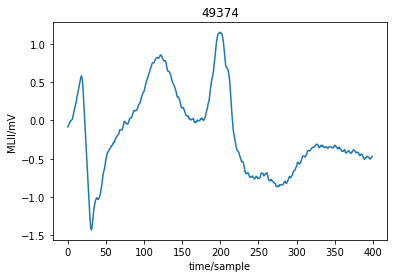

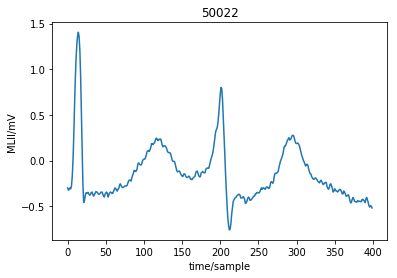

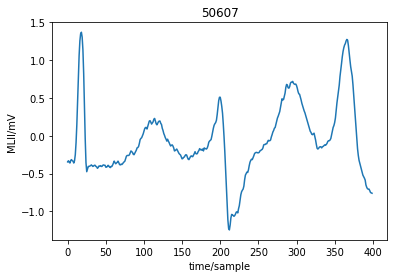

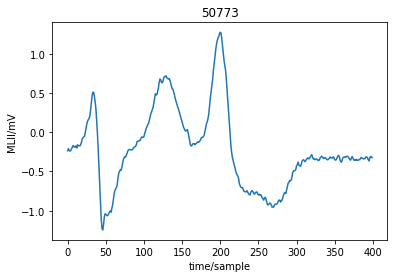

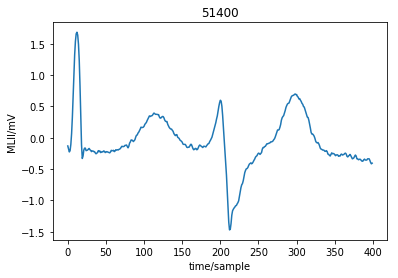

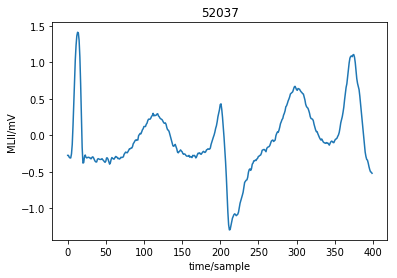

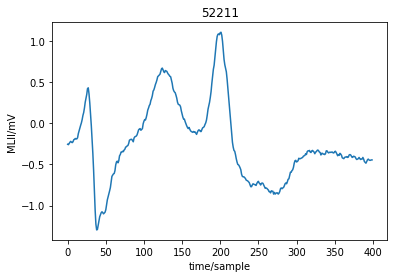

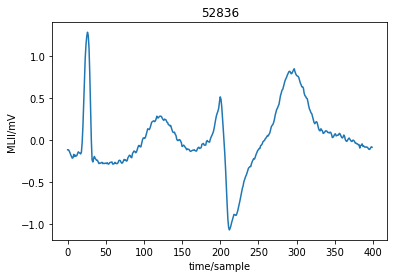

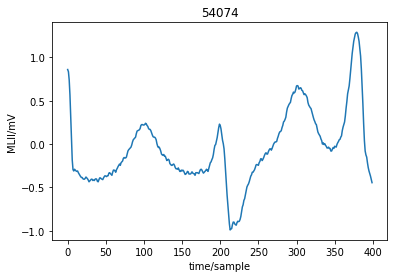

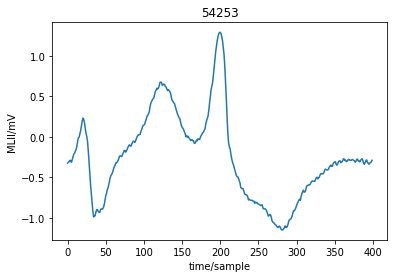

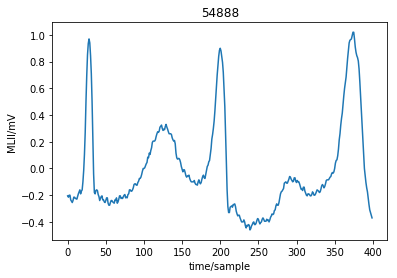

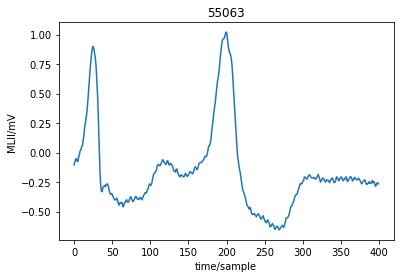

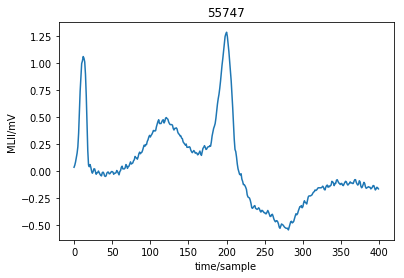

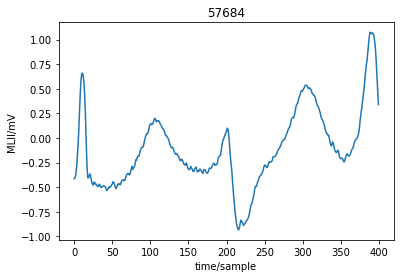

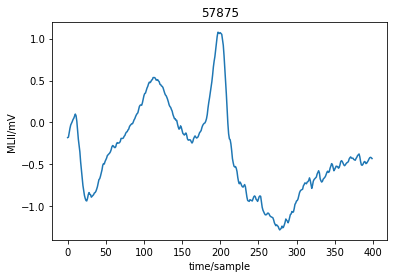

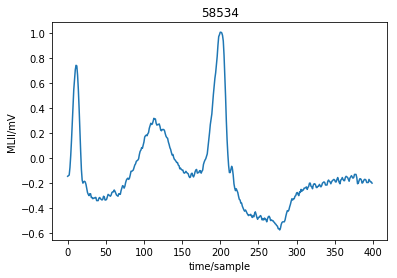

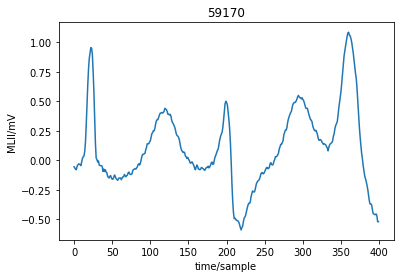

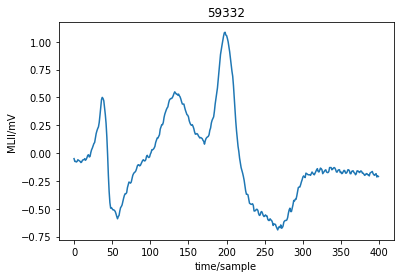

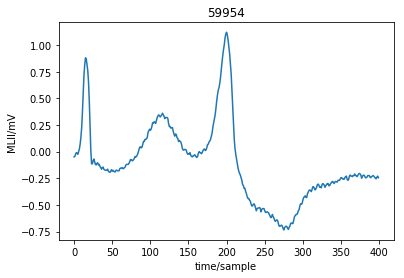

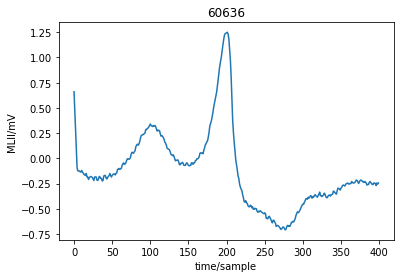

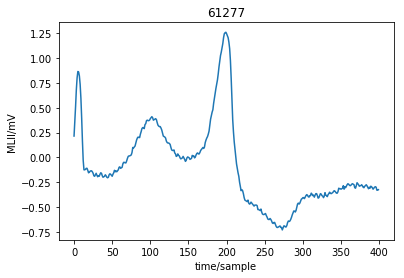

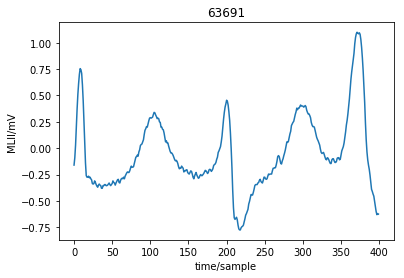

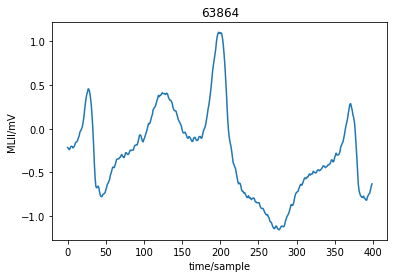

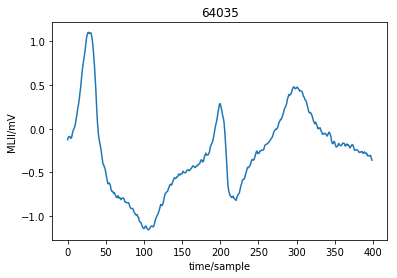

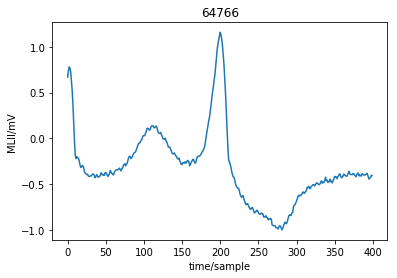

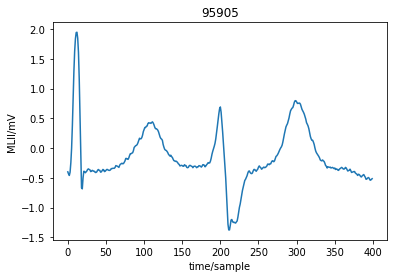

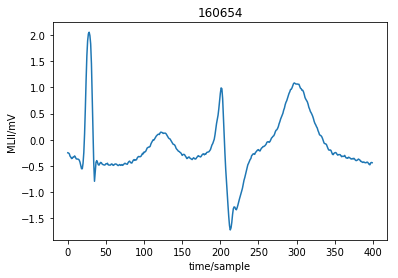

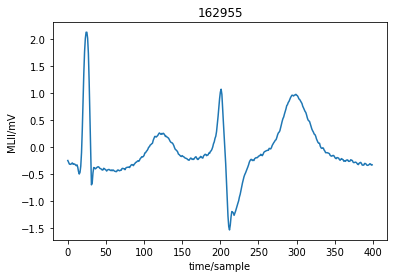

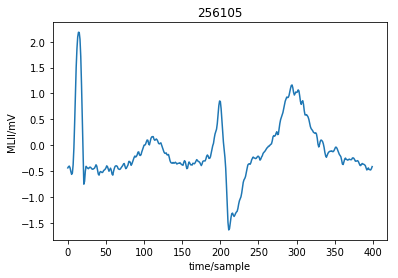

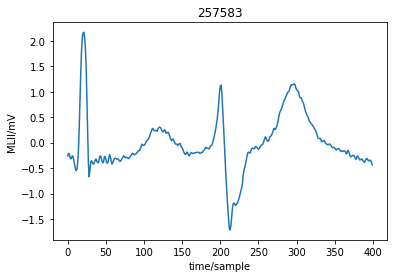

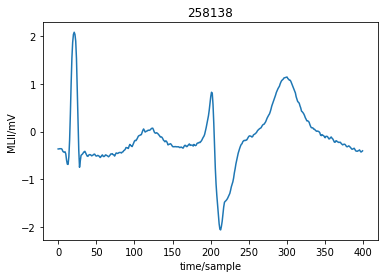

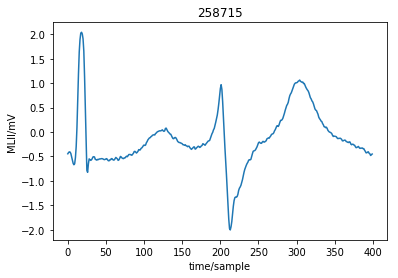

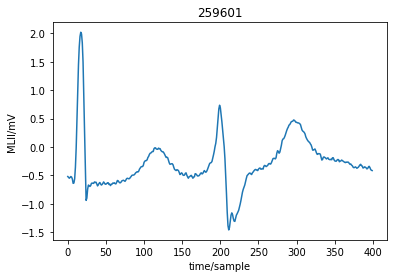

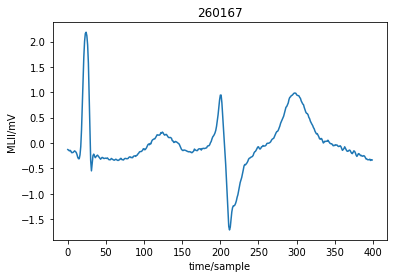

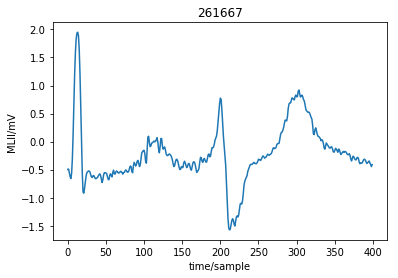

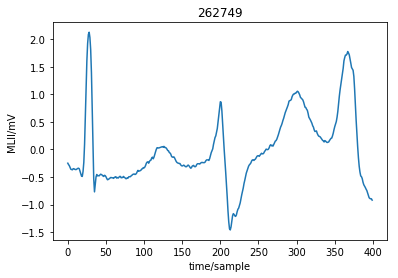

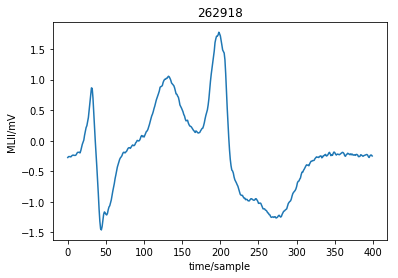

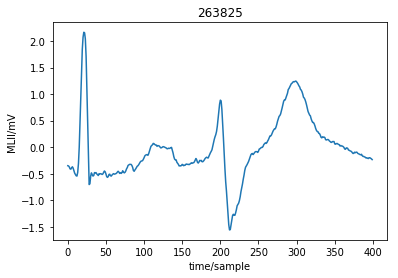

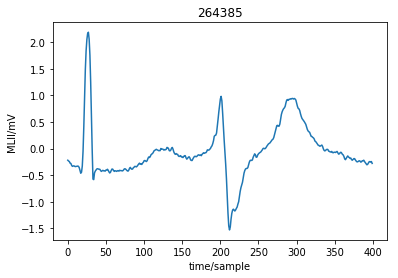

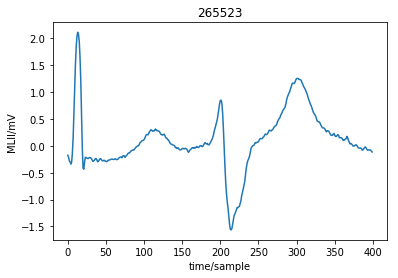

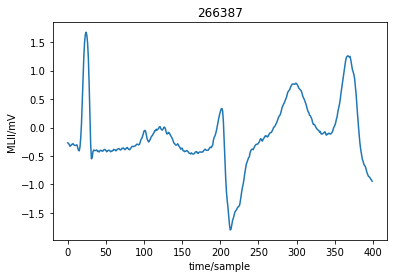

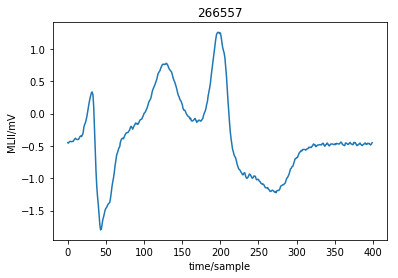

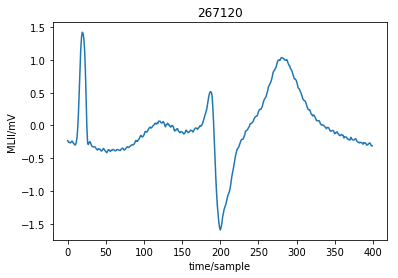

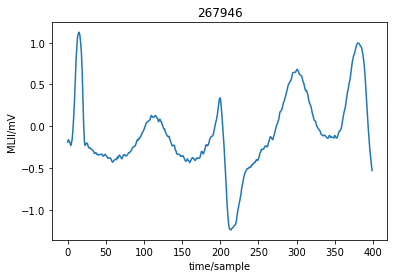

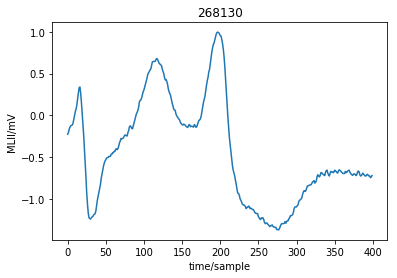

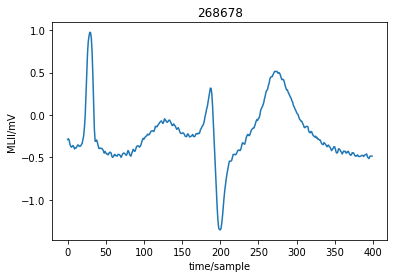

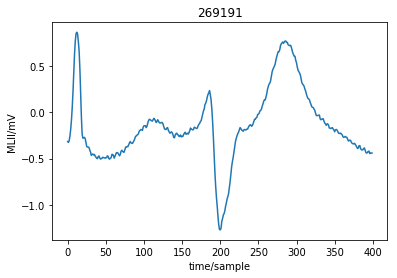

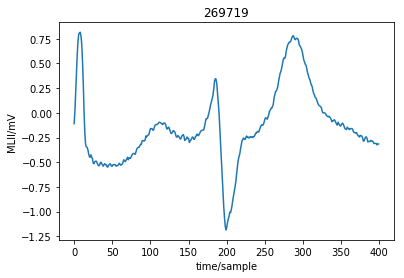

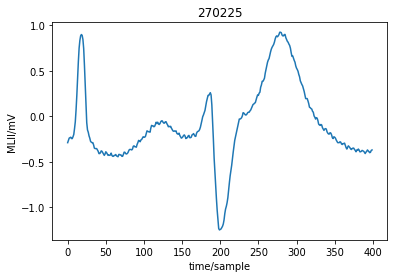

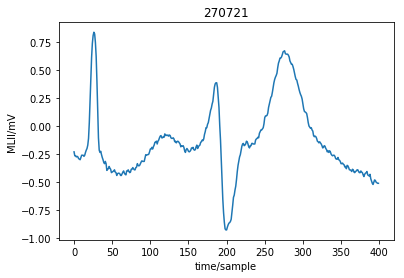

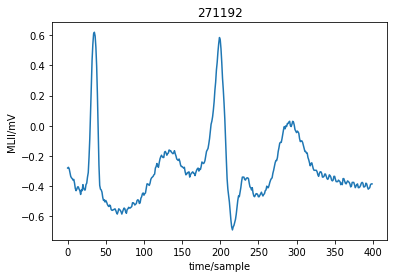

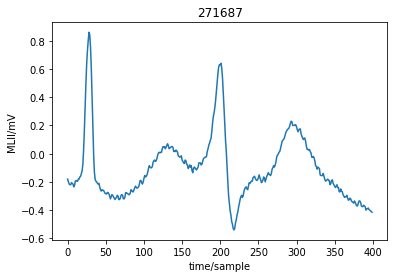

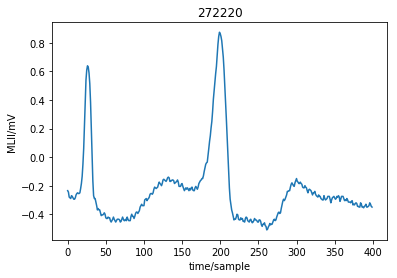

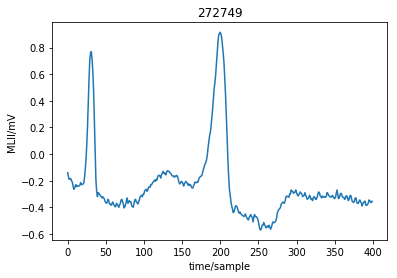

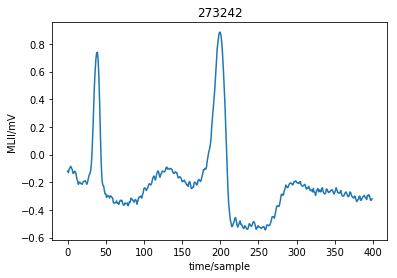

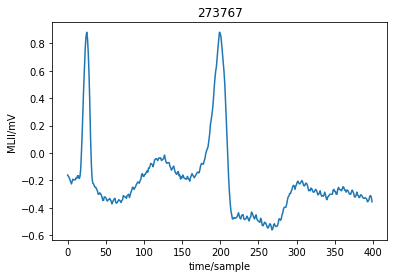

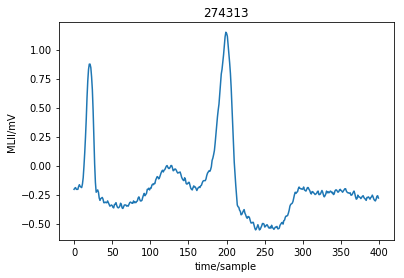

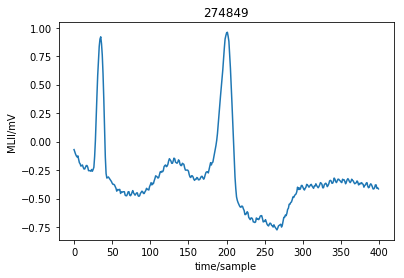

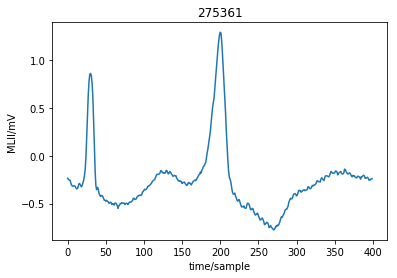

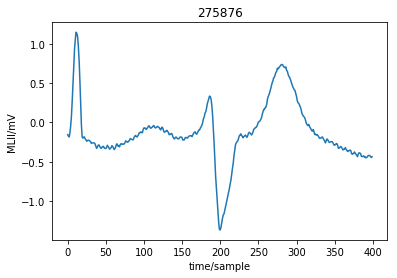

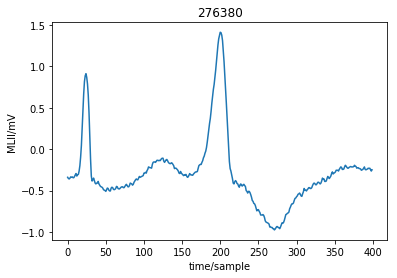

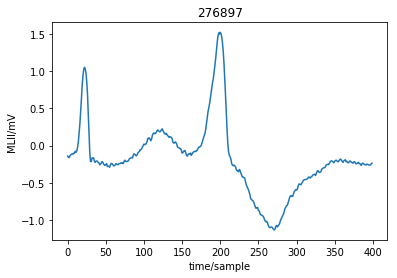

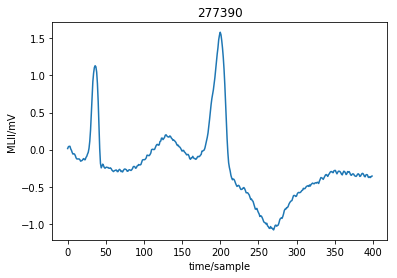

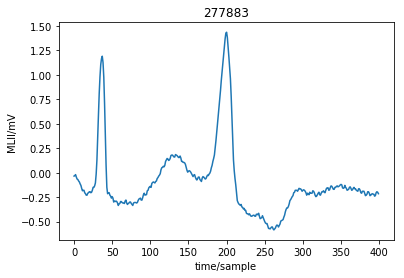

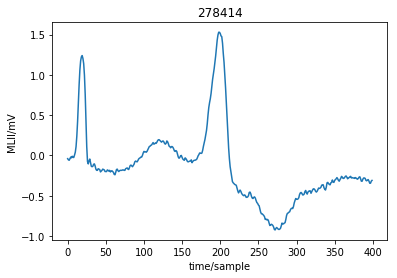

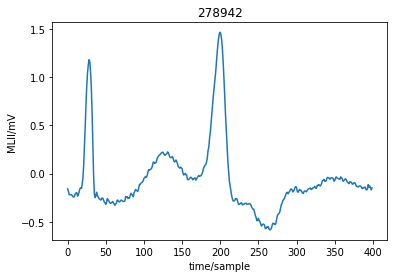

In [74]:
dataset = {}
for rec_no in recs:
    data = "../dataset/mitdb/"+rec_no
    result_to = "../dataset/images-full/"+rec_no
    #record = wfdb.rdrecord(data, channels=[0])
    #rqrs = processing.xqrs_detect(record.p_signal[:,0], record.fs)
    figure = []
    for i in range(881):
        if annotation.symbol[i] == 'V':
            start = annotation.sample[i]-200
            stop = annotation.sample[i]+200
            if start<0: 
                start=0
            temp_rec = wfdb.rdrecord(data, sampfrom=start,sampto=stop, channels=[0])
            figure.append(wfdb.plot_wfdb(record=temp_rec, plot_sym=True, title=annotation.sample[i], return_fig=True))
            figure[-1].savefig(result_to + "/" + str(rqrs[i]) + ".png")
            plt.close()
    dataset[rec_no] = figure